## IBM HR ANALYTICS EMPLOYEE ATTRITION MODELING

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

In [21]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [22]:
#load dataset
attr_dat=pd.read_csv(r'C:\Users\PSingh\DS with Python\IBM Attrition Data.csv')

In [23]:
#view top 5 rows
attr_dat.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [24]:
#columns of dataset
print(attr_dat.columns.values)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


In [25]:
#shape of the dataset
attr_dat.shape

(1470, 13)

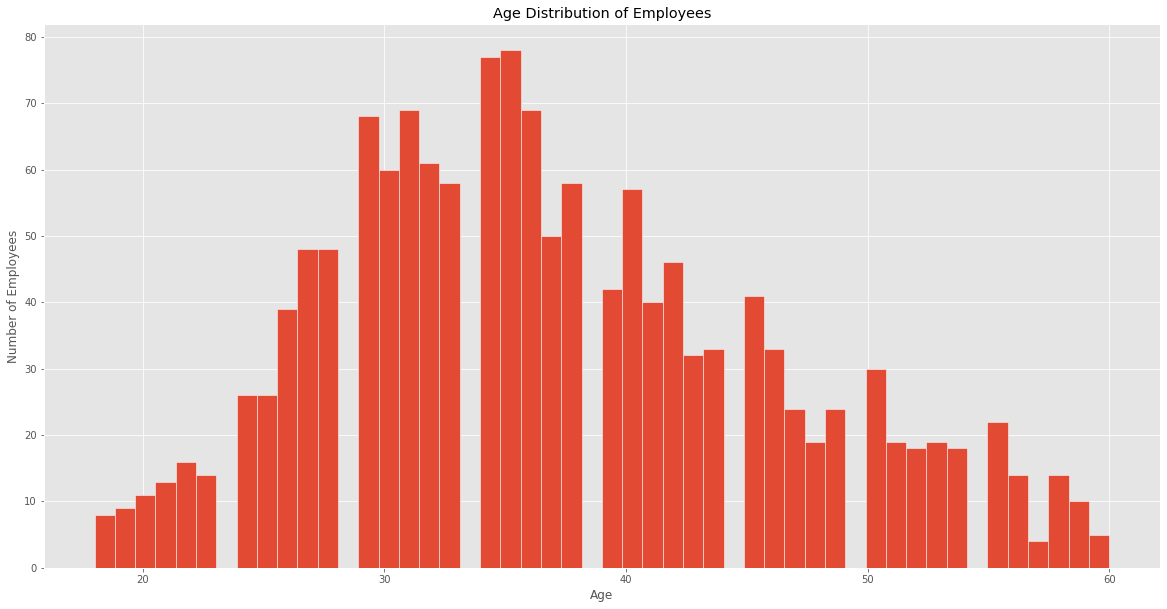

In [26]:
#age distribution of the employees in IBM
plt.figure(figsize=(20,10))
style.use('ggplot')
plt.hist(attr_dat['Age'],bins=50,ec='white')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Age Distribution of Employees')
plt.show()


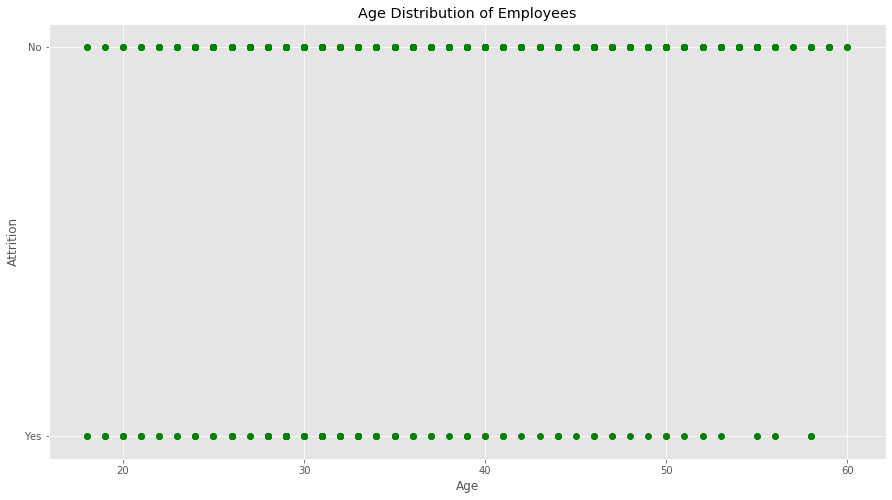

In [27]:
#explore attrition by age
plt.figure(figsize=(15,8))
style.use('ggplot')
plt.scatter(attr_dat['Age'],attr_dat['Attrition'],c='g')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.title('Age Distribution of Employees')
plt.show()

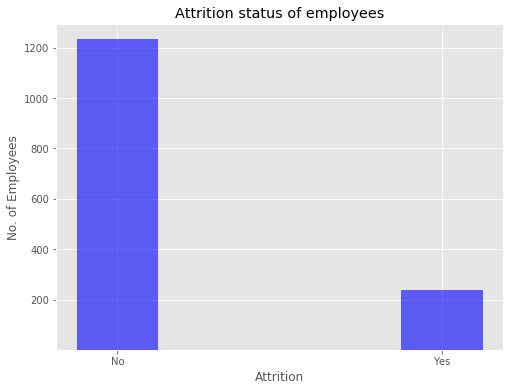

In [28]:
#Explore data for left employees
plt.figure(figsize=(8,6))
style.use('ggplot')
x=attr_dat['Attrition'].value_counts()
plt.bar(x.index,height=x.values,color='b',alpha=0.6,width=0.25,align='center',bottom=0.5)
plt.xlabel('Attrition')
plt.ylabel('No. of Employees')
plt.title('Attrition status of employees')
plt.show()

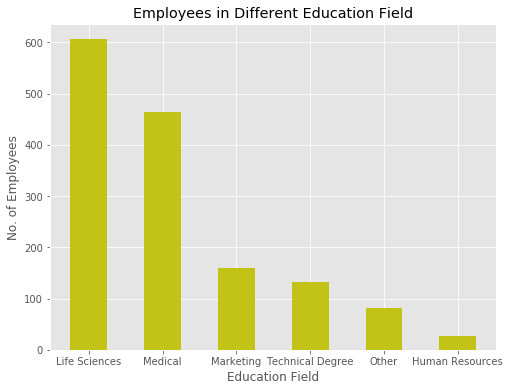

In [29]:
#Distribution by education field
plt.figure(figsize=(8,6))
style.use('ggplot')
ed_fld=attr_dat['EducationField'].value_counts()
plt.bar(ed_fld.index,height=ed_fld.values,color='y',alpha=0.9,width=0.5,align='center')
plt.xlabel('Education Field')
plt.ylabel('No. of Employees')
plt.title('Employees in Different Education Field')
plt.show()

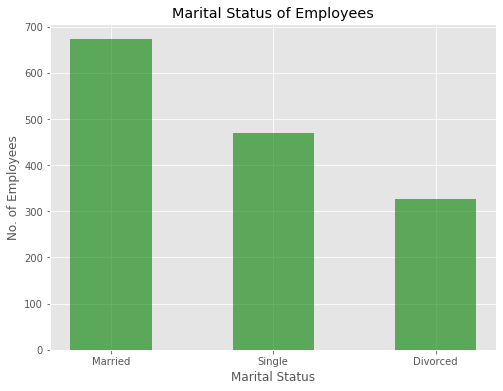

In [30]:
#employees with marital status
plt.figure(figsize=(8,6))
style.use('ggplot')
mar_stat=attr_dat['MaritalStatus'].value_counts()
plt.bar(mar_stat.index,height=mar_stat.values,color='g',alpha=0.6,width=0.5,align='center')
plt.xlabel('Marital Status')
plt.ylabel('No. of Employees')
plt.title('Marital Status of Employees')
plt.show()

In [31]:
#Data cleaning and format conversion
attr_dat.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [32]:
#Attrition,EducationField,MaritialStatus and Department have string values that needs to be converted to numerical values
attr_dat['Attrition'].replace('Yes',1,inplace=True)
attr_dat['Attrition'].replace('No',0,inplace=True)

In [33]:
attr_dat['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [34]:
#creating labels for department
attr_dat['Department'].replace('Research & Development',1,inplace=True)
attr_dat['Department'].replace('Sales',2,inplace=True)
attr_dat['Department'].replace('Human Resources',3,inplace=True)

In [35]:
#creating labels for marital status
attr_dat['MaritalStatus'].replace('Married',1,inplace=True)
attr_dat['MaritalStatus'].replace('Single',2,inplace=True)
attr_dat['MaritalStatus'].replace('Divorced',3,inplace=True)

In [36]:
#creating labels for marital status
attr_dat['EducationField'].replace('Life Sciences',1,inplace=True)
attr_dat['EducationField'].replace('Medical',2,inplace=True)
attr_dat['EducationField'].replace('Other',3,inplace=True)
attr_dat['EducationField'].replace('Marketing',4,inplace=True)
attr_dat['EducationField'].replace('Technical Degree',5,inplace=True)
attr_dat['EducationField'].replace('Human Resources',6,inplace=True)

In [37]:
attr_dat.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,3,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [38]:
attr_dat['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [39]:
attr_dat['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [40]:
attr_dat['EducationField'].value_counts()

1    606
2    464
4    159
5    132
3     82
6     27
Name: EducationField, dtype: int64

In [41]:
attr_dat['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [42]:
#Creating feature and target variables
x_feat=attr_dat[['Age','Department','DistanceFromHome','Education',
 'EducationField','EnvironmentSatisfaction','JobSatisfaction','MaritalStatus',
                 'MonthlyIncome','NumCompaniesWorked','WorkLifeBalance','YearsAtCompany']]
y_targ=attr_dat['Attrition']

In [43]:
#creating training and test data sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_feat,y_targ)

In [49]:
#Creating Logistic Regression Model and training the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=2000)
log_reg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#predicting the output
y_pred=log_reg.predict(xtest)

In [53]:
#Determining the evaluation matrices
from sklearn import metrics
accuracy=metrics.accuracy_score(ytest,y_pred)
print(accuracy)

0.845108695652174


In [54]:
metrics.average_precision_score(ytest,y_pred)

0.18614799742985652

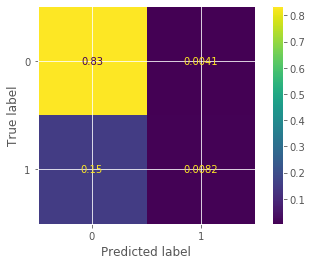

In [63]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg,x_feat,y_targ,normalize='all')

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[307,   3],
       [ 54,   4]], dtype=int64)

In [62]:
print (metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       310
           1       0.57      0.07      0.12        58

    accuracy                           0.85       368
   macro avg       0.71      0.53      0.52       368
weighted avg       0.81      0.85      0.79       368



In [64]:
#renaming
attr_dat.rename(columns={'MaritalStatus':'Marital Status'})

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,Marital Status,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,3,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,2,3,4,1,2571,4,3,5
1466,39,0,1,6,1,2,4,1,1,9991,4,3,7
1467,27,0,1,4,3,1,2,2,1,6142,1,3,6
1468,49,0,2,2,3,2,4,2,1,5390,2,2,9


In [68]:
attr_dat.corr()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.159205,-0.007652,-0.001686,0.208034,-0.012036,0.010146,-0.004892,-0.035466,0.497855,0.299635,-0.021490,0.311309
Attrition,-0.159205,1.000000,0.077351,0.077924,-0.031373,0.089755,-0.103369,-0.103481,0.011195,-0.159840,0.043494,-0.063939,-0.134392
Department,-0.007652,0.077351,1.000000,0.002196,0.019636,0.327145,-0.026110,-0.006231,-0.030818,0.056573,-0.011261,0.075507,0.029752
DistanceFromHome,-0.001686,0.077924,0.002196,1.000000,0.021042,0.014662,-0.016075,-0.003669,-0.021916,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,-0.031373,0.019636,0.021042,1.000000,0.027491,-0.027128,-0.011296,-0.000107,0.094961,0.126317,0.009819,0.069114
EducationField,-0.012036,0.089755,0.327145,0.014662,0.027491,1.000000,0.033743,-0.048512,-0.027563,0.004378,-0.004780,0.039308,-0.005427
EnvironmentSatisfaction,0.010146,-0.103369,-0.026110,-0.016075,-0.027128,0.033743,1.000000,-0.006784,0.022628,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.103481,-0.006231,-0.003669,-0.011296,-0.048512,-0.006784,1.000000,-0.001494,-0.007157,-0.055699,-0.019459,-0.003803
MaritalStatus,-0.035466,0.011195,-0.030818,-0.021916,-0.000107,-0.027563,0.022628,-0.001494,1.000000,-0.018836,0.031652,-0.000751,-0.014779
MonthlyIncome,0.497855,-0.159840,0.056573,-0.017014,0.094961,0.004378,-0.006259,-0.007157,-0.018836,1.000000,0.149515,0.030683,0.514285


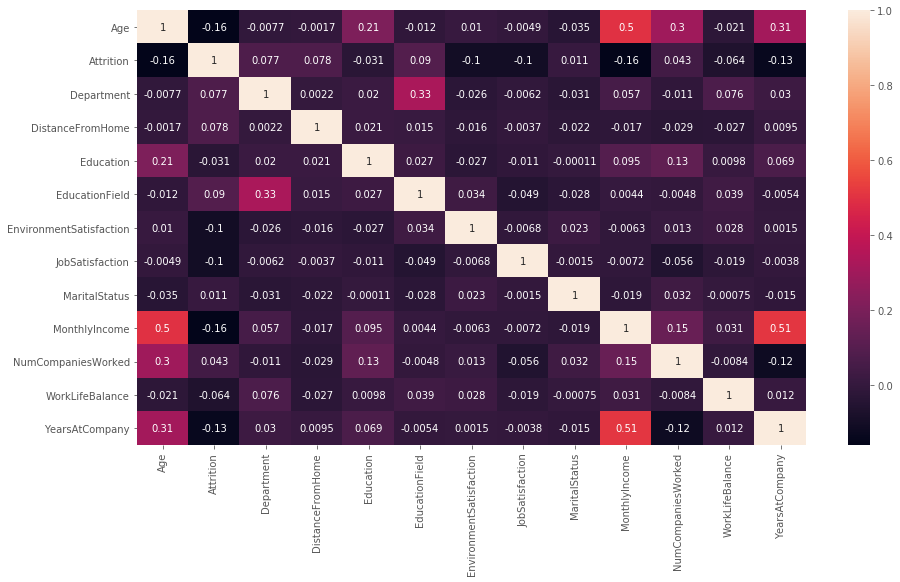

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(attr_dat.corr(),annot=True)